# **Análisis Matemático III - Ingeniería en Inteligencia Artificial** 
## *Trabajo práctico 1 - Series de Fourier*

##### - Santos Torrado, Segundo (34349)
##### - Schuemer, Ignacio (34575)
##### - Torres, Santiago Tomas (34580)

Una señal f(t) periódica cumple las condiciones de Dirichlet si en cualquier período:
+ tiene un número finito de máximos y mínimos aislados.
+ tiene un número finito de puntos de discontinuidad finita.
+ $f(t)$ debe ser absolutamente integrable sobre un período. $$\int_{T_o}\left|x(t)\right|dt < \infty$$
 

Se realiza el análisis del cumplimiento de las condiciones de Dirichlet para las señales de tren de pulso, diente de sierra y la triangular: 

$\text{ Tren de pulso } \rightarrow x(t) = A \textit{ sgn}(\sin(2\pi f t))$

El tren de pulso cumple con las condiciones de Dirichlet ya que en todo período de longitud $\frac{1}{f}$ tiene una cantidad finita de discontinuidades de saltos finitos. Si se toma el intervalo $[0, \frac{1}{f}]$ tiene 3 discontinuidades en cada intervalo genérico  (en $t = 0$, $\frac{1}{2f}$, $\frac{1}{f}$). Además esas discontinuidades tienen saltos de largo $A$, por lo tanto finito. Por último, $x(t)$ es absolutamente integrable sobre un período, convergiendo dicha integral a $\frac{A}{f}$.

$ \text{Diente de sierra } \rightarrow y(t) = A (t f - \lfloor\frac{1}{2}+tf\rfloor)$

El diente de sierra cumple con las condiciones de Dirichlet ya que en todo período de longitud $\frac{1}{f}$ tiene una cantidad finita de discontinuidades de saltos finitos. Si se toma el intervalo $[0, \frac{1}{f}]$ tiene una discontinuidad en cada intervalo genérico ( en $t =\frac{1}{2f}$). Además esta discontinuidad tiene un salto de largo $A$, por lo tanto finito. Por último, $x(t)$ es absolutamente integrable sobre un período, convergiendo dicha integral a $\frac{A}{4f}$.

$ \text{Señal triangular } \rightarrow x(t) = 4A |tf - \lfloor\frac{1}{2}+tf\rfloor| - A$

La señal triangular cumple con las condiciones de Dirichlet ya que en todo período de longitud $\frac{1}{f}$ no posee discontinuidades y tiene cantidad finita de máximos y mínimos. $x(t)$ es absolutamente integrable sobre un período, convergiendo dicha integral a $\frac{A}{2f}$.

A continuación se realiza el gráfico de las tres señales

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from tp1_Santos_Schuemer_Torres_functions import *

plt.style.use('tp1.mplstyle')

SyntaxError: invalid syntax (483458018.py, line 3)

In [103]:
A = 1 
F = 1 
T = 1 / F

t = np.linspace(-1, 1, 1000)

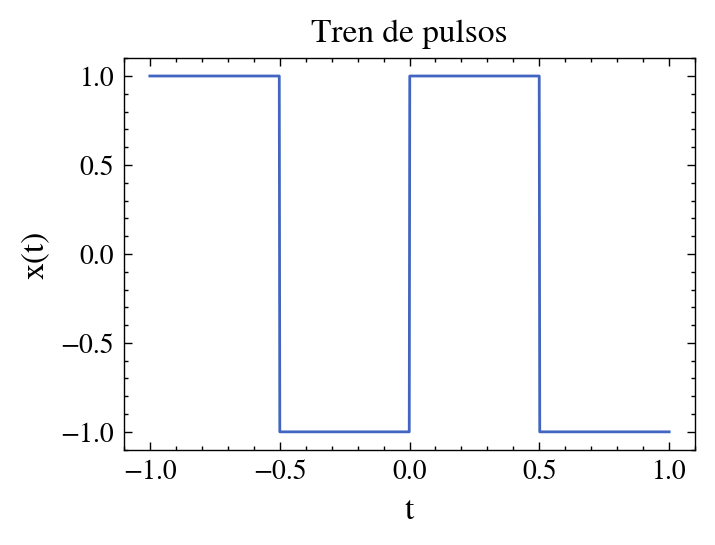

In [104]:
# Plot Tren de pulsos

plt.plot(t, pulse_train(A, F)(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Tren de pulsos')
plt.show()

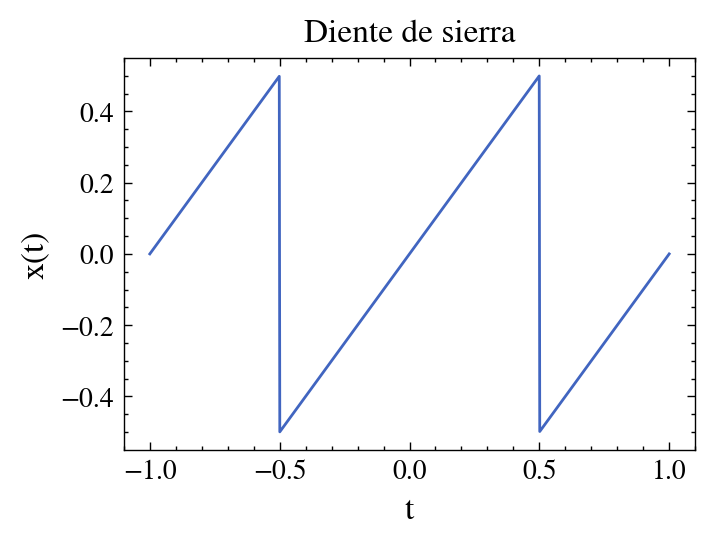

In [105]:
# Plot diente de sierra

plt.plot(t, sawtooth(A, F)(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Diente de sierra') 
plt.show()

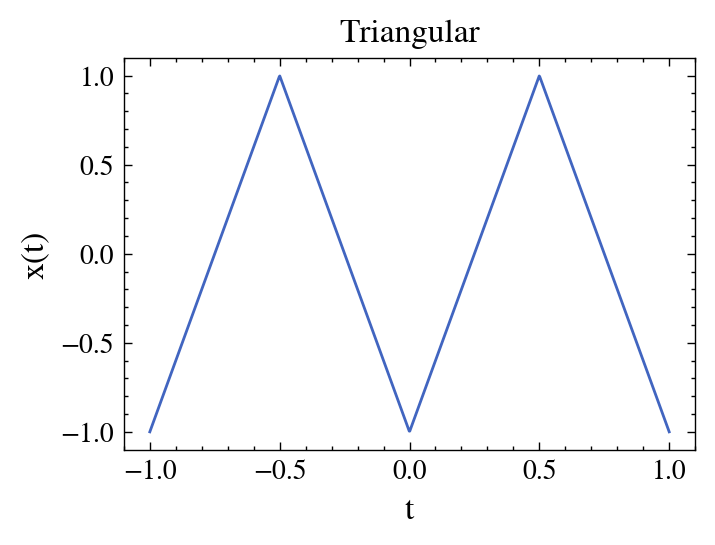

In [106]:
# Plot Triangular

plt.plot(t, triangle(A, F)(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Triangular')
plt.show()

Se realizan los cálculos de los coeficientes de las series de Fourier para cada una de las tres señales. Posteriormente se crean funciones para sintetizar las señales con un número arbitario de armónicos. Se grafican las señales originales junto con sus aproximaciones por series de Fourier utilizando 10, 30 y 50 armónicos. 

## *Serie de Fourier del Tren de Pulsos*

\begin{align*}
\\
&\text{Sea } x(t) = A \, \text{sgn}(\sin(2\pi ft)), \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que }
\\\\
& \qquad A \, \text{sgn}(\sin(2\pi ft)) = 
\begin{cases}
-A & -\frac{1}{2f} \leq t < 0
\\\\
0  & t = 0
\\\\
A  & 0 < t \leq \frac{1}{2f}
\end{cases}
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $c_n$}
\\\\
&\text{de la forma exponencial de la serie de Fourier de $x(t)$.}
\\\\
\end{align*}


\begin{align*}
c_n &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) e^{-j\frac{2\pi}{T}nt} dt = \frac{1}{\frac{1}{f}} \int_{-\frac{1}{2f}}^{\frac{1}{2f}} x(t) e^{-j \frac{2\pi}{\frac{1}{f}}nt} dt
\\\\
&= f \int_{-\frac{1}{2f}}^{0} -A e^{-j2\pi fnt} dt + f \int_{0}^{0} 0 dt + f \int_{0}^{\frac{1}{2f}} A e^{-j2\pi fnt} dt
\\\\
&= Af \left(\int_{0}^{-\frac{1}{2f}} e^{-j2\pi fnt} dt + \int_{0}^{\frac{1}{2f}} e^{-j2\pi fnt} dt \right)
\\\\
&= Af \left(-\frac{e^{-j2\pi fnt}}{j 2\pi fn}\Bigg|_{0}^{-\frac{1}{2f}}  - \frac{e^{-j2\pi fnt}}{j 2\pi fn}\Bigg|_{0}^{\frac{1}{2f}}\right)
\\\\
&= Af \left(-\frac{e^{-j\pi n} -1}{j2\pi fn} - \frac{e^{-j\pi n } - 1}{j2\pi fn} \right)
\\\\ 
&= -\frac{A}{j \pi n} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2} -1 \right)
\\\\
&= j\frac{A}{\pi n} \left[\cos(\pi n) - 1 \right]
\\\\ 
&= -j\frac{A}{\pi n} \left[1 - \cos(\pi n) \right]
\\\\
\implies c_n &= -j \cdot \frac{A}{\pi n} \cdot \left[1 - (-1)^n \right]
\\\\
\end{align*}


\begin{align*}
\\\\
&\text{Por último, se derivan los coeficientes $a_n$ y $b_n$ de la forma}
\\\\
&\text{trigonométrica de la serie de Fourier a partir de $c_n$.}
\\\\
\end{align*}

\begin{align*}
a_n &= 2 \Re\left[c_n \right] = 2 \left[ 0 \right]
\\\\
\implies a_n &= 0
\\\\
b_n &= -2 \Im\left[c_n \right] = -2 \left[ -\frac{A}{\pi n} \cdot \left[1 - (-1)^n \right] \right]
\\\\
\implies b_n &= \frac{2A}{\pi n} \cdot \left[1 - (-1)^n \right]
\\\\
\end{align*}

Aproximaciones utilizando 10, 30 y 50 armónicos

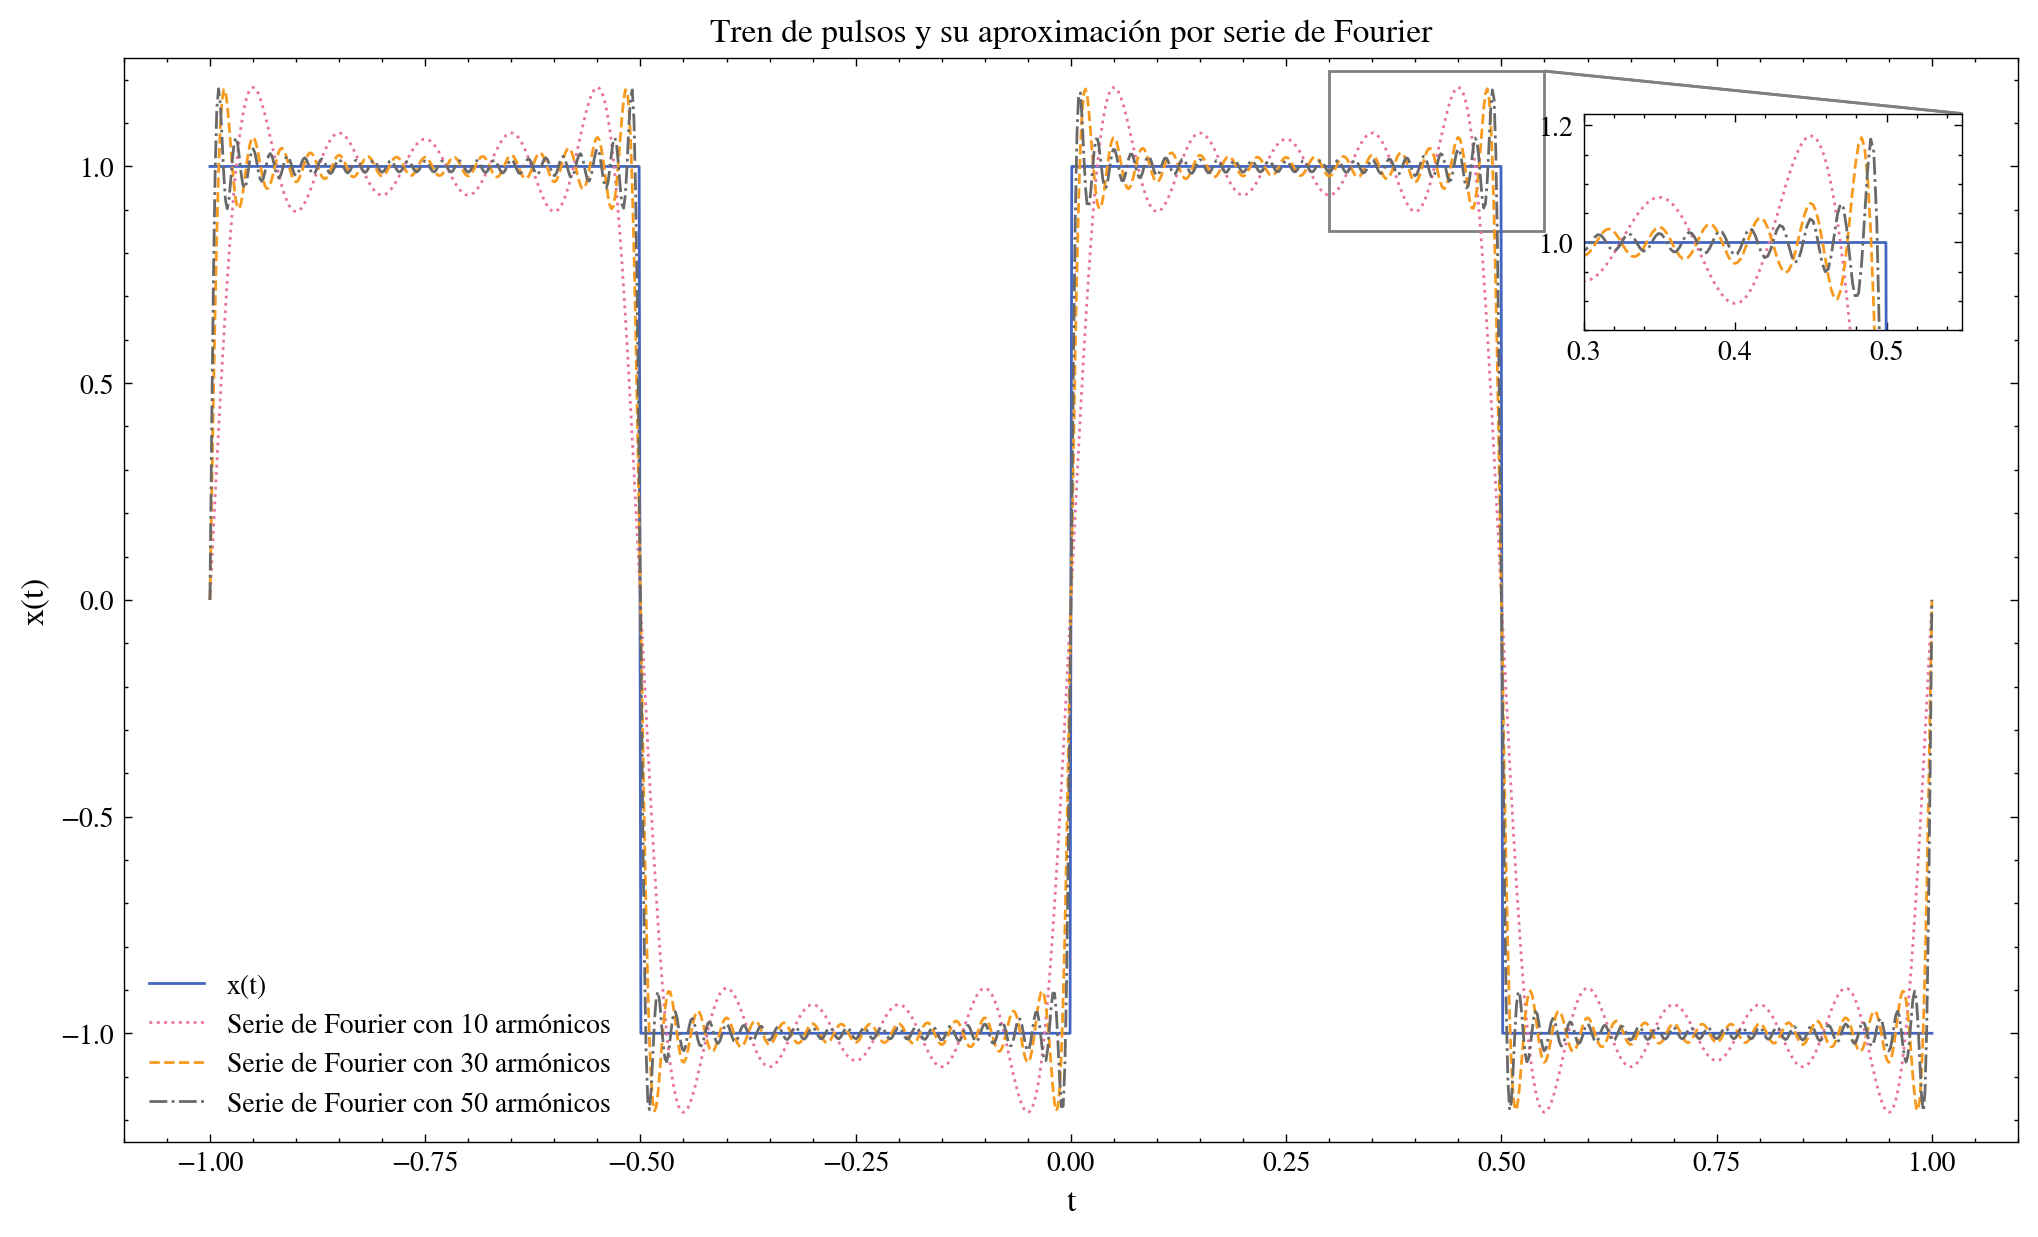

In [107]:
A = 1 
F = 1 
T = 1 / F

# Coeficientes de Tren de pulsos
a01, an1, bn1 = sf_pulse_train(A)

# Plot de la función Tren de pulsos y las aproximaciones 
fig, ax = plt.subplots(figsize=(10, 6))

armonics = [10, 30, 50]
ax.plot(t, pulse_train(A,F)(t), label='x(t)')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, armonics[0])(t), label=f'Serie de Fourier con {armonics[0]} armónicos')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, armonics[1])(t), label=f'Serie de Fourier con {armonics[1]} armónicos')
ax.plot(t, trigFourierSeries(an1, bn1, a01, T, armonics[2])(t), label=f'Serie de Fourier con {armonics[2]} armónicos')

ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Tren de pulsos y su aproximación por serie de Fourier')
ax.legend(loc='best')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="20%", height="20%", loc='upper right', borderpad=2)
axins.plot(t, pulse_train(A, F)(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 10)(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 30)(t))
axins.plot(t, trigFourierSeries(an1, bn1, a01, T, 50)(t))

axins.set_xlim(0.30, 0.55)
axins.set_ylim(0.85, 1.22)

mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.5")

plt.show()

-----

## *Serie de Fourier del Diente de sierra*

\begin{align*}
\\
&\text{Sea } x(t) = A \left(tf-\left\lfloor \frac{1}{2} + tf \right\rfloor \right), \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que } \left\lfloor \frac{1}{2} + tf \right\rfloor = 0 \quad \forall t \in I.
\\\\
&\text{Luego, se tiene que la señal $x(t)$ restringida a $I$ es de la forma:}
\\\\
& \qquad x_I(t) = Atf.
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $c_n$}
\\\\
&\text{de la forma exponencial de la serie de Fourier de $x(t)$.}
\\\\
\end{align*}

\begin{align*}
c_n &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t) e^{-j\frac{2\pi}{T}nt} \, dt= \frac{1}{\frac{1}{f}} \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j\frac{2\pi}{\frac{1}{f}}nt} \, dt
\\\\
&= f \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j2\pi fnt} \, dt = Af^2 \int_{-\frac{1}{2f}}^{\frac{1}{2f}} t e^{-j2\pi fnt} \, dt
\\\\
&= Af^2 \left[ \left(t \frac{e^{-j2\pi fnt}}{-j2\pi fn}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} - \int_{-\frac{1}{2f}}^{\frac{1}{2f}} e^{-j2\pi fnt}dt \right]
\\\\
&= Af^2 \left[\frac{1}{2f} \frac{e^{-j\pi n}}{-j2\pi nf} + \frac{1}{2f} \frac{e^{j\pi n}}{-j2\pi nf} + \left(\frac{e^{-j2\pi fnt}}{j2\pi nf}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} \right]
\\\\
&= Af^2 \left[-\frac{1}{2f} \left(\frac{e^{j\pi n}}{j2\pi nf} + \frac{e^{-j\pi n}}{j2\pi nf}\right) + \frac{e^{-j\pi n}}{j2\pi nf} - \frac{e^{j\pi n}}{j2\pi nf}\right]
\\\\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2}\right) - f \left(\frac{e^{j\pi n}- e^{-j\pi n}}{2j}\right)\right]
\\\\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \cos(\pi n) - f \sin(\pi n) \right]
\\\\
&= \frac{A}{\pi n} \frac{j}{2} \cos(\pi n)
\\\\
\implies c_n &= j \cdot \frac{A}{2 \pi n} \cdot (-1)^n
\\\\
\end{align*}

\begin{align*}
&\text{Por último, se derivan los coeficientes $a_n$ y $b_n$ de la forma}
\\\\
&\text{trigonométrica de la serie de Fourier a partir de $c_n$.}
\\\\
\end{align*}

\begin{align*}
a_n &= 2 \Re\left[c_n \right] = 2 \left[ 0 \right]
\\\\
\implies a_n &= 0
\\\\
b_n &= -2 \Im\left[c_n \right] = -2 \left[ \frac{A}{2} \frac{\cos(\pi n)}{\pi n} \right]
\\\\
&= -A \cdot \frac{\cos(\pi n)}{\pi n}
\\\\
\implies b_n &= -\frac{A}{\pi n} \cdot(-1)^n
\\
\end{align*}

Aproximaciones utilizando 10, 30 y 50 armónicos

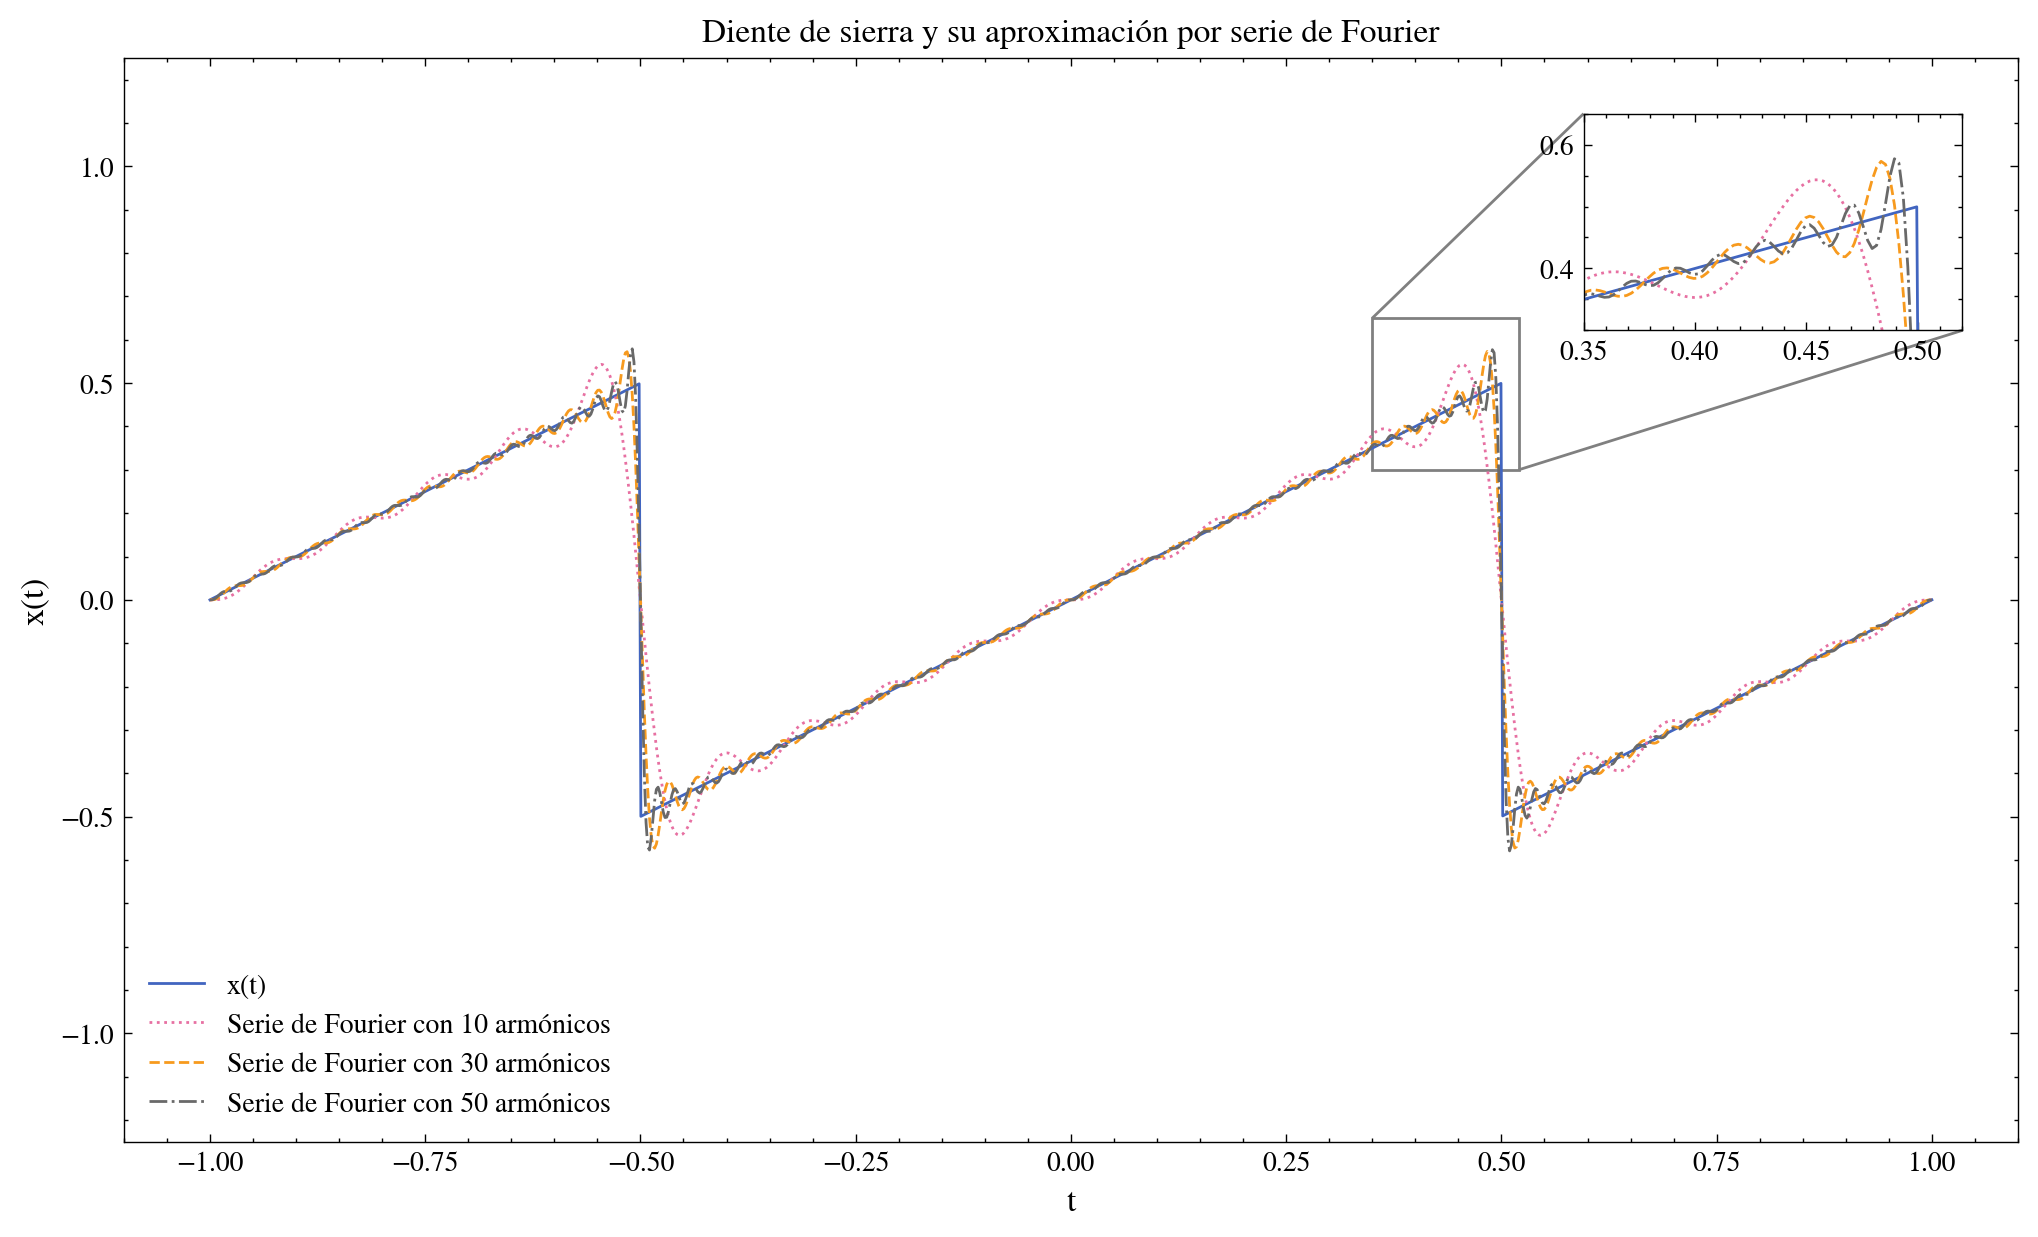

In [108]:
A = 1 
F = 1 
T = 1 / F

# Coeficientes de diente de sierra
a02, an2, bn2 = sf_sawtooth(A,F)

# Plot de la función de Diente de sierra y las aproximaciones
fig, ax = plt.subplots(figsize=(10, 6))

armonics = [10, 30, 50]
ax.plot(t, sawtooth(A,F)(t), label='x(t)')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, armonics[0])(t), label=f'Serie de Fourier con {armonics[0]} armónicos')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, armonics[1])(t), label=f'Serie de Fourier con {armonics[1]} armónicos')
ax.plot(t, trigFourierSeries(an2, bn2, a02, T, armonics[2])(t), label=f'Serie de Fourier con {armonics[2]} armónicos')

ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Diente de sierra y su aproximación por serie de Fourier')
ax.legend(loc='lower left')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="20%", height="20%", loc="upper right", borderpad=2)
axins.plot(t, sawtooth(A, F)(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 10)(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 30)(t))
axins.plot(t, trigFourierSeries(an2, bn2, a02, T, 50)(t))

axins.set_xlim(0.35, 0.52)
axins.set_ylim(0.3, 0.65)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

----

## *Serie de Fourier de la Señal Triangular*

\begin{align*}
\\
&\text{Sea } x(t) = 4A\left|ft - \left\lfloor ft + \frac{1}{2} \right\rfloor \right| -A, \text{ con período } T = \frac{1}{f}.
\\\\
&\text{Se considera el intervalo } I=\left[-\frac{1}{2f}, \frac{1}{2f}\right] \text{ tal que }
\\\\
& \text{$x(t)$ restringida a $I$ es de la forma:}
\\\\
& \qquad x_I(t) = 
\begin{cases}
-A-4Aft, & -\frac{1}{2f} \leq t < 0 \\\\
-A+4Aft, & 0 \leq t \leq \frac{1}{2f} \\
\end{cases}
\\\\
&\text{A continuación, se calcula la expresión de los coeficientes $a_n$ y $b_n$}
\\\\
&\text{de la forma trigonométrica de la serie de Fourier de $x(t)$.}
\\\\
\\\\
&\text{Se observa que $x(t)$ es par con respecto al eje vertical, esto es,}
\\\\
& \qquad x(t) = x(-t) \, \forall t.
\\\\
& \text{ Por lo tanto, se anula $b_n$. }
\\\\
& \qquad \implies b_n = 0.
\\\\
&\text{Luego, solo queda calcular $a_n$.}
\\\\
\end{align*}

\begin{align*}
\\\\
a_n &= \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t)\cos(2\pi nft) dt
\\\\
&= 2f \left( \int_{-\frac{T}{2}}^{0} (-A-4Aft) \cos(2\pi nft) dt + \int_{0}^{\frac{T}{2}} (-A + 4Aft) \cos(2\pi nft) dt \right)
\\\\
\text{ (es par) } \rightarrow &= 2 \cdot 2f \int_{0}^{\frac{T}{2}} (-A+4Aft) \cos(2\pi nft) dt
\\\\
&= -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt + 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt
\\\\
\end{align*}

\begin{align*}
\\\\
\text{ $1.$ Resolvemos } & \quad -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt
\\\\
&= -4Af \left(\frac{\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right)
\\\\
&= -\frac{2A}{n\pi} \sin(\pi n)
\\\\
&= 0
\\\\
\\\\
\text{ $2.$ Resolvemos } & \quad 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt
\\\\
&= 16Af^2 \left( \left[\frac{t\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right] - \frac{1}
\\\\
{2\pi nf} \int_{0}^{\frac{1}{2f}} \sin(2\pi nft)dt \right)
\\\\
&= 16Af^2 \left[\frac{\sin(n\pi)}{4\pi nf^2} - \frac{1}{2\pi nf} \left(-\frac{\cos(2\pi nft)}{2\pi nf}\right)\Bigg|_{0}^{\frac{1}{2f}}\right]
\\\\
&= \frac{16Af^2}{4\pi^2 n^2 f^2} \left(\cos(n\pi) - 1 \right) = \frac{4A}{\pi^2 n^2} \left(\cos(n\pi) - 1 \right)
\\\\
\implies a_n &= \frac{4A}{\pi^2 n^2} \left[\left(-1 \right)^{n} - 1 \right]
\\\\
\end{align*}

Aproximaciones utilizando 10, 30 y 50 armónicos

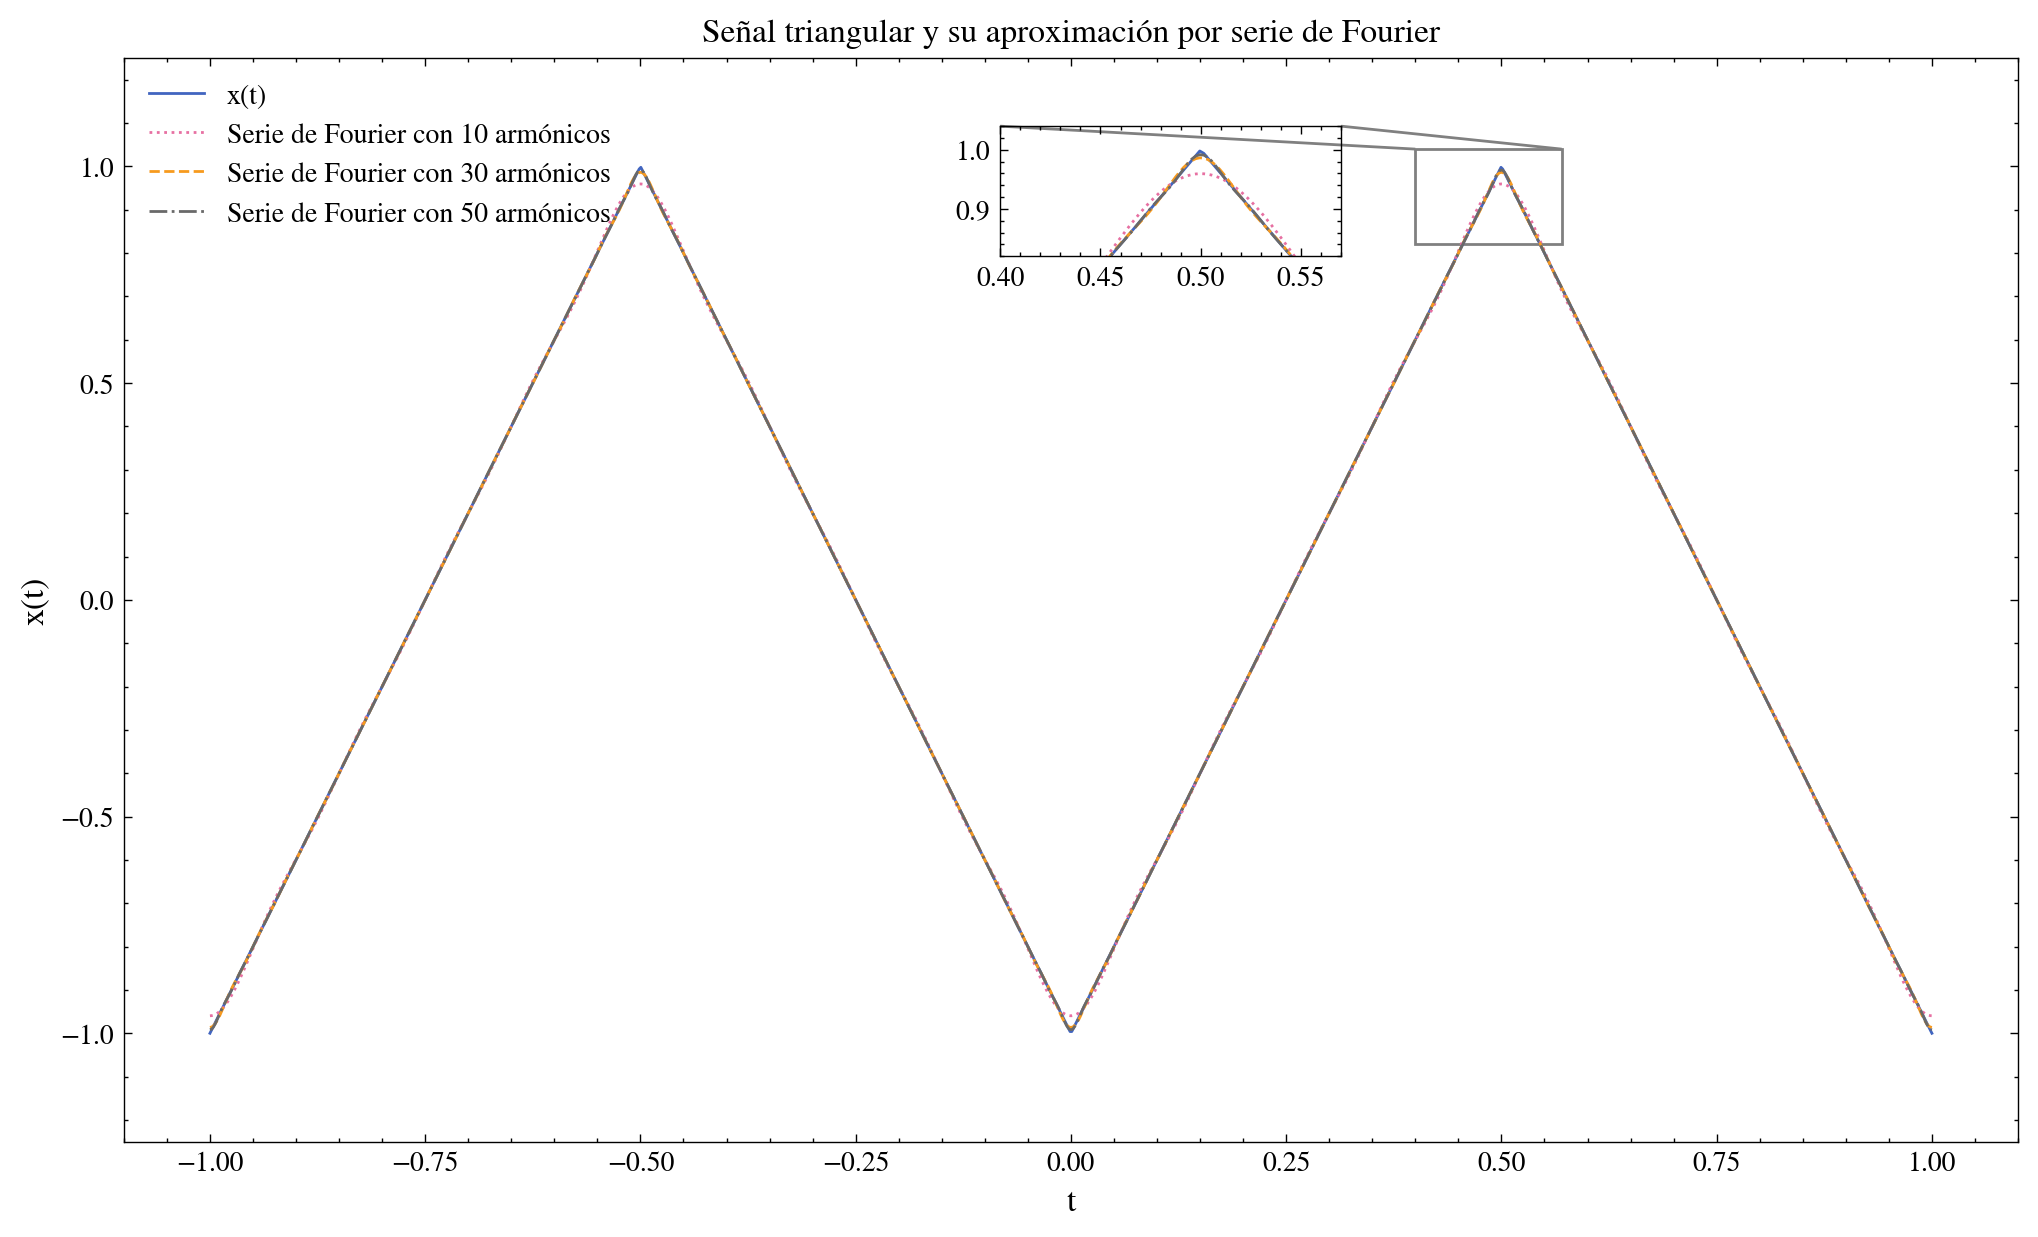

In [109]:
A = 1 
F = 1 
T = 1 / F

# Coeficientes de la señal triangular
a03, an3, bn3 = sf_triangle_wave(A)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot de la señal triangular y las aproximaciones
armonics = [10, 30, 50]
ax.plot(t, triangle(A,F)(t), label='x(t)')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, armonics[0])(t), label=f'Serie de Fourier con {armonics[0]} armónicos')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, armonics[1])(t), label=f'Serie de Fourier con {armonics[1]} armónicos')
ax.plot(t, trigFourierSeries(an3, bn3, a03, T, armonics[2])(t), label=f'Serie de Fourier con {armonics[2]} armónicos')

ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Señal triangular y su aproximación por serie de Fourier')
ax.legend(loc='upper left')

original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

axins = inset_axes(ax, width="30%", height="20%", bbox_to_anchor=(0.05, 0.35, 0.6, 0.6), bbox_transform=ax.transAxes)
axins.plot(t, triangle(A, F)(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 10)(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 30)(t))
axins.plot(t, trigFourierSeries(an3, bn3, a03, T, 50)(t))

axins.set_xlim(0.40, 0.57)
axins.set_ylim(0.82, 1.04)

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.show()

Se manifiesta el fenómeno de Gibbs como un sobrepico alrededor de las discontinuidades de las señales tren de pulsos y diente de sierra, las cuales poseen discontinuidades. Esto se debe a que la serie de Fourier busca representar la señal periódica como una suma de senos y cosenos, por lo que al presentarse saltos abruptos (debido a las discontinuidades) en la señal se dificulta su aproximación con estas componentes. 

En los gráficos se presenta un zoom en las zonas cercanas a las discontinuidades en donde se produce el fenómeno de Gibbs. Además se visualiza que el fenómeno se ve atenuado con el incremento en la cantidad de armónicos. 

---

Se calcula el error cuadrático medio (ECM) de las aproximaciones por serie de Fourier de las tres señales para distintas cantidades de armónicos en zonas sin discontinuidades.

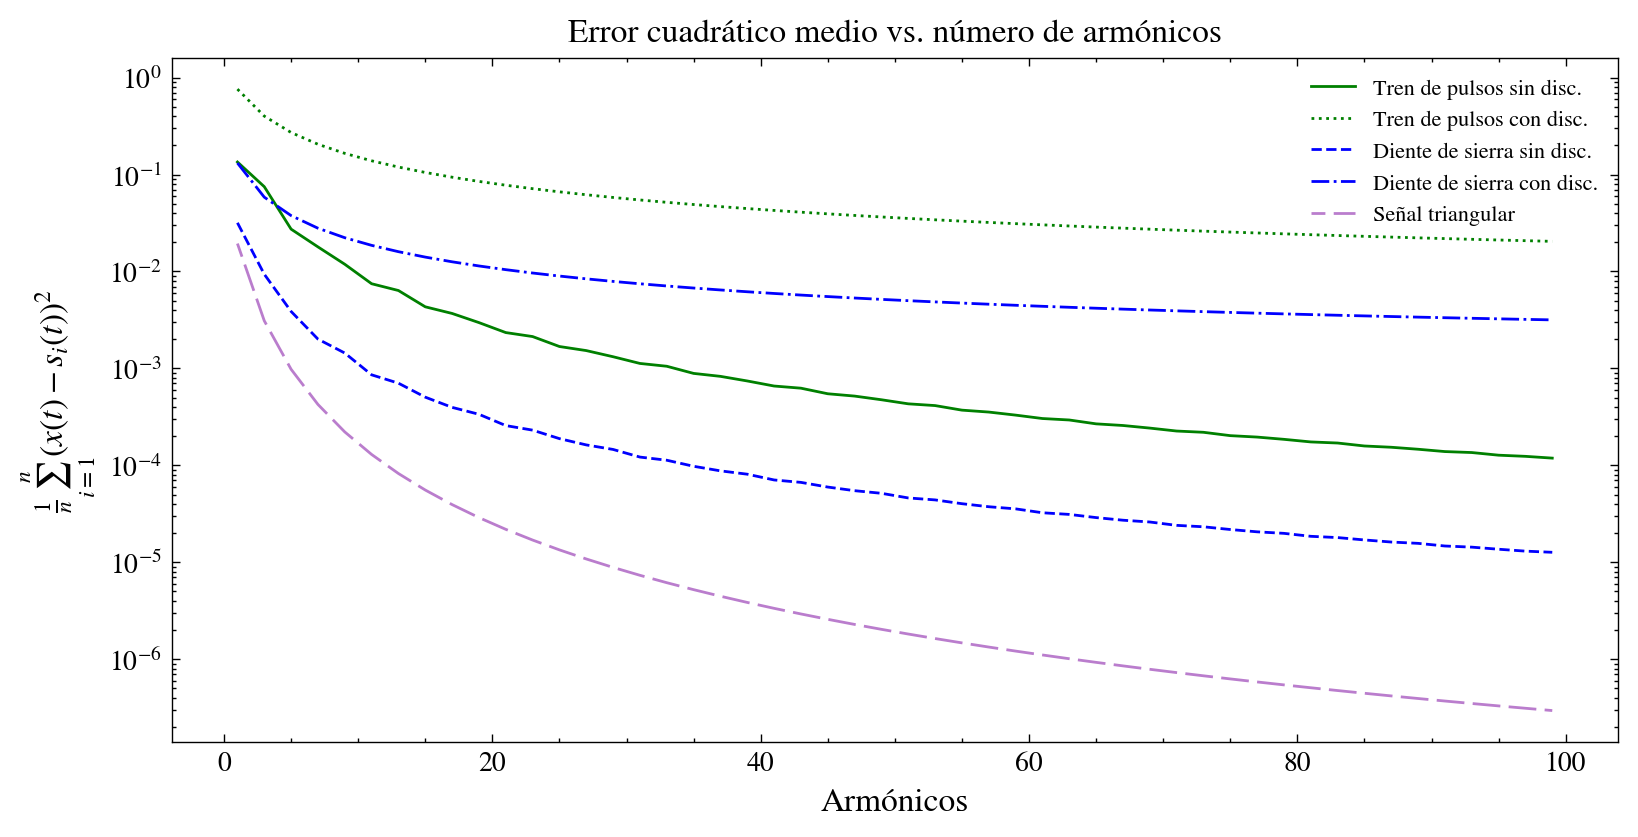

In [110]:
A = 2
F = 0.5
T = 1 / F
t = np.linspace(-1, 1, 1000)
n = np.arange(1, 100, 2)

# Tren de pulsos
a0pt, anpt, bnpt = sf_pulse_train(A)
xpt = pulse_train(A,F)
discontinuityPT = [-1, 0, 1]
tpt = removeDiscontinuity(t, discontinuityPT)

# Diente de sierra
a0st, anst, bnst = sf_sawtooth(A,F)    
yst = sawtooth(A,F)
discontinuityST = [-1, 1]
tst = removeDiscontinuity(t, discontinuityST)

# Triangular
a0tt, antt, bntt = sf_triangle_wave(A)
ztt = triangle(A,F)

errorptDis = errorVsTerms(xpt, anpt, bnpt, a0pt, T, n, tpt)
errorstDis = errorVsTerms(yst, anst, bnst, a0st, T, n, tst)
errorpt = errorVsTerms(xpt, anpt, bnpt, a0pt, T, n, t)
errorst = errorVsTerms(yst, anst, bnst, a0st, T, n, t)
errortt = errorVsTerms(ztt, antt, bntt, a0tt, T, n, t)

plt.figure(figsize=(8, 4))
plt.plot(n, errorptDis, label=f'Tren de pulsos sin disc.', color='green')
plt.plot(n, errorpt, label=f'Tren de pulsos con disc.', color='green')
plt.plot(n, errorstDis, label=f'Diente de sierra sin disc.', color='blue')
plt.plot(n, errorst, label=f'Diente de sierra con disc.', color='blue')
plt.plot(n, errortt, label=f'Señal triangular')
plt.xlabel('Armónicos')
plt.ylabel(r'$\frac{1}{n} \sum_{i=1}^n (x(t) - s_i(t))^2$')
plt.title('Error cuadrático medio vs. número de armónicos')
plt.legend(fontsize=8)
plt.yscale('log')
plt.show()

Al excluir las zonas que se ven afectadas por el fenómeno de Gibbs (cercanas a las discontinuidades) se tiene un error menor como se aprecia en la figura anterior. 

Además se puede ver que en las señales continuas, como por ejemplo, la triangular, la serie de Fourier aproxima de mejor manera que a las señales que sí presentan discontinuidades como en el caso del tren de pulsos y diente de sierra. 

---

A continuación se fija un error cuadrático medio $\epsilon$ y se reporta la cantidad de armónicos necesarios para obtener ese valor de error.

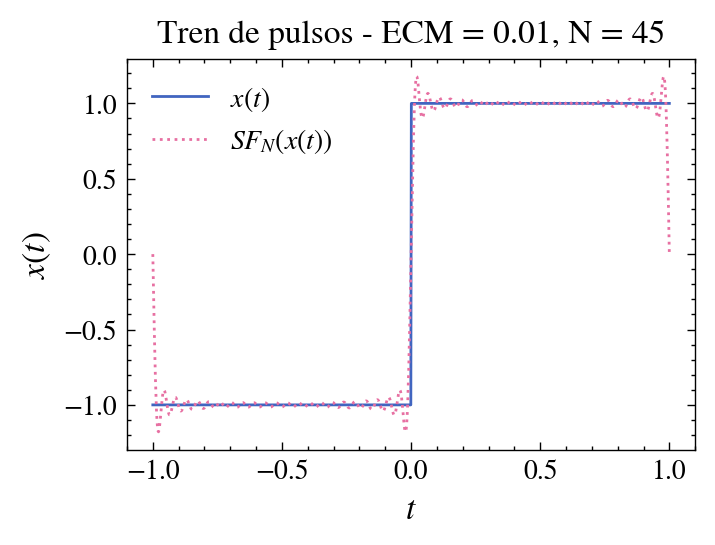

Número de armónicos necesarios para tener un error cuadrático medio menor a 0.01 de la serie de Fourier trigonométrica del tren de pulsos: 45


In [111]:
e = 0.01
A = 1
F = 0.5
T = 1 / F
N = NHarmonics(pulse_train(A,F), an1, bn1, a01, T, e, t)
f1 = trigFourierSeries(an1, bn1, a01, T, N)

plt.plot(t, pulse_train(A,F)(t), label=r'$x(t)$')
plt.plot(t, f1(t), label=r'$SF_{N}(x(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.legend()
plt.title(f'Tren de pulsos - ECM = {e}, N = {N}')
plt.show()

print(f'Número de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica del tren de pulsos:', N)


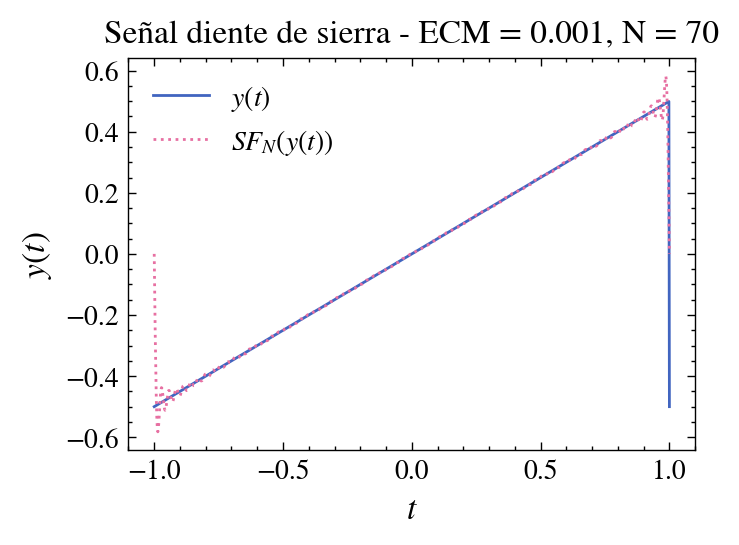

Número de armónicos necesarios para tener un error cuadrático medio menor a 0.001 de la serie de Fourier trigonométrica de la señal diente de sierra: 70


In [112]:
e = 0.001
A = 1
F = 0.5
T = 1 / F
N = NHarmonics(sawtooth(A,F), an2, bn2, a02, T, e, t)  
f2 = trigFourierSeries(an2, bn2, a02, T, N)

plt.plot(t, sawtooth(A,F)(t), label=r'$y(t)$')
plt.plot(t, f2(t), label=r'$SF_{N}(y(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title(f'Señal diente de sierra - ECM = {e}, N = {N}')
plt.show()

print(f'Número de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la señal diente de sierra:', N)


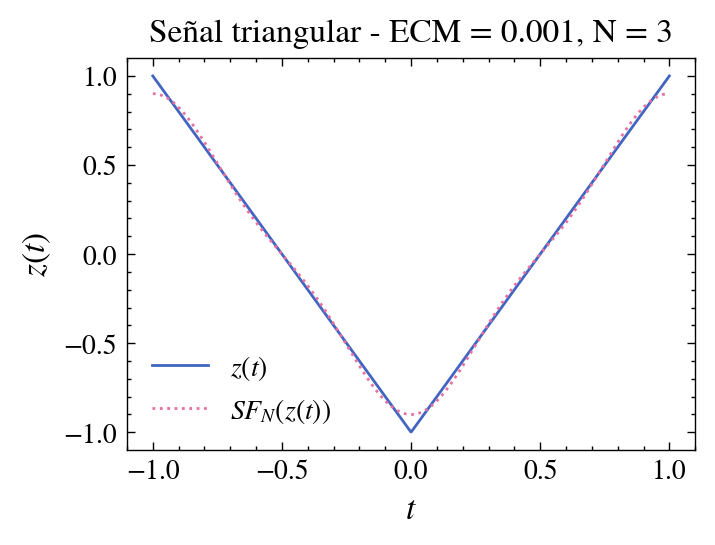

Número de armónicos necesarios para tener un error cuadrático medio menor a 0.001 de la serie de Fourier trigonométrica de la onda triangular: 3


In [113]:
e = 0.001
N = NHarmonics(triangle(A,F), an3, bn3, a03, T, e, t)
f = trigFourierSeries(an3, bn3, a03, T, N)

plt.plot(t, triangle(A,F)(t), label=r'$z(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(z(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$z(t)$')
plt.legend()
plt.title(f'Señal triangular - ECM = {e}, N = {N}') 
plt.show()

print(f'Número de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda triangular:', N)


Se vuelve a realizar el experimento anterior pero en este caso se compara la señal completa con respecto a la misma sin tener en cuenta las zonas cercanas a las discontinuidades. Se busca determinar la influencia de estas zonas para obtener el mismo error dado previamente. 

In [114]:
A = 1
F = 0.5
T = 1/F

# Tren de pulsos
a0pt, anpt, bnpt = sf_pulse_train(A)
xpt = pulse_train(A,F)
discontinuityPT = [-1, 0, 1]
tpt = removeDiscontinuity(t, discontinuityPT)
epsilon = 0.01

print("TREN DE PULSOS") 
print(f'Para un ECM < 0.01 de la señal Tren de pulsos con discontinuidades, necesitamos {NHarmonics(xpt, anpt, bnpt, a0pt, T, epsilon, t)} armónicos')
print(f'Para un ECM < 0.01 de la señal Tren de pulsos sin discontinuidades, necesitamos {NHarmonics(xpt, anpt, bnpt, a0pt, T, epsilon, tpt)} armónicos')


# Diente de sierra
a0st, anst, bnst = sf_sawtooth(A,F)
yst = sawtooth(A,F)
discontinuityST = [-1, 1]
tst = removeDiscontinuity(t, discontinuityST)
epsilon = 0.001

print("\nDIENTE DE SIERRA")
print(f'Para un ECM < 0.001 de la señal Diente de sierra con discontinuidades, necesitamos {NHarmonics(yst, anst, bnst, a0st, T, epsilon, t)} armónicos')
print(f'Para un ECM < 0.001 de la señal Diente de sierra sin discontinuidades, necesitamos {NHarmonics(yst, anst, bnst, a0st, T, epsilon, tst)} armónicos')


TREN DE PULSOS
Para un ECM < 0.01 de la señal Tren de pulsos con discontinuidades, necesitamos 45 armónicos
Para un ECM < 0.01 de la señal Tren de pulsos sin discontinuidades, necesitamos 5 armónicos

DIENTE DE SIERRA
Para un ECM < 0.001 de la señal Diente de sierra con discontinuidades, necesitamos 70 armónicos
Para un ECM < 0.001 de la señal Diente de sierra sin discontinuidades, necesitamos 5 armónicos


Se concluye que aumentar arbitrariamente el número de armónicos utilizados en una aproximación por serie de Fourier puede tener un efecto significativo en la precisión de la serie y en la relación con el error cuadrático medio (ECM) entre la aproximación y la señal original. A medida que se aumenta el número de armónicos, la estimación tiende a mejorar su precisión, es decir, la función resultante se parecerá cada vez más a la señal original. Esto se debe a que (en la teoría) si se tomasen un número infinito de armónicos, la serie de Fourier es exactamente igual a la señal original; pero como computacionalmente esto no es posible, aumentar lo más que se pueda hará que el ECM disminuya y se reduzca la discrepancia entre ambas señales. 